In [ ]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

text1 = 'This is a foo bar sentence .'
text2 = 'This sentence is similar to a foo bar sentence .'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

print('Cosine:', cosine)

In [ ]:
pip install tweepy

In [ ]:
import os
import pandas as pd
import tweepy as tw


In [ ]:
pip install python-twitter --user

In [ ]:
import twitter

In [ ]:
api = twitter.Api(consumer_key='5QUCmsZc97JKVhSW7UqB4PmGO',
                      consumer_secret='Szv1qILgFywnl1IbLakJDIqbt44unJOXWEWY7iZ2ksw6WZvDjx',
                      access_token_key='1159073576495923200-s1eAfxDF86zf9J7brJoe2CEFwU0UW0',
                      access_token_secret='sxA356gk2uPJFU5iIyoB2yKLUrAbnvZpSGV9cRtqzEWb7')

In [ ]:
users = api.GetFriends()
print([u.name for u in users])
timel=api.GetHomeTimeline()
tie2=api.GetUserTimeline(screen_name="MMitanshu")
for ti in tie2:
    print(ti)
results = api.GetSearch(
    raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=100")
for res in results:
    print(res)
results = api.GetSearch(raw_query="q=shiny pants&result_type=recent&since=2014-07-19",result_type='mixed')
for res in results:
    print(res)
#tweet_mode used to get full text inplace of truncated
results = api.GetSearch(
    raw_query="q=holi%20&tweet_mode=extended",include_entities=True,result_type='recent')
for res in results:
    print(res)

In [ ]:
pip install beautifulsoup4

In [ ]:
from requests import get
url = 'https://twitter.com/search?q=shiny%20pants&src=typed_query'
response = get(url)
print(response.text)
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
movie_containers = html_soup.find_all('div')
print(type(movie_containers))
print(len(movie_containers))
for m in movie_containers:
    print(m)

In [ ]:
pip install -U selenium --user

In [ ]:
#data scrapping code
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
#from selenium.common.exceptions import TimeOutException, NoSuchElementException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import json
import logging

# path where the selenium driver is copied.
#for lab pc ashish
#driver_path = '/home/ashishranjan/chromedriver'
#for home pc ashish
# driver_path = '/home/ashish/Downloads/chromedriver'
#for lab pc anurag
driver_path = '/home/anurag.barfa/mywork/btp/chromedriver'
#for home pc anurag
# driver_path = '/home/anurag/Work/btp/BTP/chromedriver'
# This will open a new chrome session.

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-notifications")
# https://stackoverflow.com/questions/53902507/unknown-error-session-deleted-because-of-page-crash-from-unknown-error-cannot
chrome_options.add_argument('--no-sandbox') 
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome(executable_path = driver_path,options=chrome_options)
#driver.get("https://twitter.com/search?q=delhi%20election&src=typed_query")
query="test"
# driver.get("https://twitter.com/search?q="+query+"&src=typed_query")
driver.get("https://twitter.com/gautamkaulgud")
SCROLL_PAUSE_TIME = 9

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")
scroll_count=10 #number of times you want to scroll the page
tweet_boxes=[]
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
    tutorial_code_soup = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2'})
    tweet = tutorial_soup.find_all('div',{'class':'css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-5f2r5o r-1mi0q7o'})
    tweet_boxes=tweet_boxes+tweet
    scroll_count=scroll_count-1
    print(scroll_count)
    if scroll_count==0:
        break
            
#tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
# tutorial_code_soup1 = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2'})
# for tweet in tutorial_code_soup1:
#     print(tweet)
# # tutorial_code_soup2 = tutorial_soup.find_all('ol',attrs={'id':'stream-items-id'})
# tutorial_code_soup2 = tutorial_soup.find_all('li',attrs={'class':'js-stream-item stream-item stream-item'})
# for tweet in tutorial_code_soup2:
#     print(tweet)
tweetstemp=[]
 
for i in tweet_boxes:
    # Add to the new list
    # only if not present
    if i not in tweetstemp:
        tweetstemp.append(i)
tweet_boxes = tweetstemp
len(tweet_boxes)

In [ ]:
def gettweet(box,query):
    tweet=box.findChildren('div',recursive=False)[1].text
    user=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[0].text
    date=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[2].attrs['title']
    likes = comments = retweet = 'None'
    span = box.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
    likes = span[3].text
    retweet = span[2].text
    comments = span[1].text
    tags=[]
    mentions=[]
    urls=0
    for anchor in box.find_all('a'):
        #print(anchor.text+"######")
        if 'href' in anchor.attrs:
            if anchor.attrs['href'].split('/')[1]=='hashtag':
                tags.append(anchor.text)
            if anchor.attrs['href'].split(':')[0]=='https':
                urls=urls+1
        if len(anchor.text)>0 and anchor.text[0]=='@':
#             mentions.append(anchor.text)
            if not ('aria-haspopup' in anchor.attrs and anchor.attrs['aria-haspopup']=="false"):
                mentions.append(anchor.text)
        
    #print(tags)
    #print(mentions)
    cosine_similarity=cosine(tweet,query)*100
    multimedia_flag=0
    s = str(box.find('img'))
    if ((box.find('img') and s.find('format')!=-1 )  or box.find('video')):
        multimedia_flag=1  
    return tweet,likes,comments,retweet,user,date,tags,mentions,multimedia_flag,urls,cosine_similarity

In [ ]:
import csv
with open('data/sample_'+query+'.csv', mode='w') as sample:
    count=0
    sample_writer = csv.writer(sample, delimiter=',')
    sample_writer.writerow(['Query','Date','user','Tweet','Img_present','Likes','commnets','retweet','tags','mentions','url_count','length','cosine_similarity(%)'])
    for boxes in tweet_boxes:
        try:
            tweet,likes,comments,retweet,user,date,tags,mentions,multimedia_flag,urls,cosine_similarity = gettweet(boxes,query)
            sample_writer.writerow([query,date, user, tweet, multimedia_flag,likes,comments,retweet,",".join(tags),",".join(mentions),urls,len(tweet),cosine_similarity])
        except:
            pass

In [ ]:
# gettweet(tweet_boxes[1426],query)
try:
#     box=tweet_boxes[1426]
    gettweet(tweet_boxes[1426],query)
except:
    print(e)
# print(box.text)
# tweet=box.findChildren('div',recursive=False)[1].text
# user=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[0].text
# date=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[2].attrs['title']
# likes = comments = retweet = 'None'
# span = box.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
# likes = span[3].text
# retweet = span[2].text
# comments = span[1].text

In [3]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

def cosine(tweet,query):
    vec1 = text_to_vector(tweet.lower())
    vec2 = text_to_vector(query.lower())
    intersection = set(vec1.keys()) & set(vec2.keys())
#     print(intersection)
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def jaccard(tweet,query):
    vec1 = text_to_vector(tweet.lower())
    vec2 = text_to_vector(query.lower())
    intersection = set(vec1.keys()) & set(vec2.keys())
    union =set(vec1.keys()) | set(vec2.keys())
    return len(intersection)/len(union)

In [4]:
#text cleaning code
import string
import re
 
from nltk.corpus import stopwords 
stopwords_english = stopwords.words('english')
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
 
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_english and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean
    

In [ ]:
pip install chainer==1.17.0 --user

In [ ]:
pip install tqdm --user

In [ ]:
pip install scipy

In [ ]:
pip install scikit-learn --user

In [ ]:
pip install h5py --user

In [5]:
# encoding: utf-8 
query='INDvAUS'
import csv
import matplotlib.pyplot as plt
from datetime import datetime, timezone
data=[] 
training_X=[]
training_Y=[]
with open('data/'+query+'.csv', mode='r',encoding='utf-8') as sample:
    sample_reader = csv.reader(sample, delimiter=',')
    title=['rank']
    for rank,row in enumerate(sample_reader):
        if rank==0:
            title=title+row
            data=[[] for x in title]
        else:
            data[0].append(rank)
            training_Y.append(rank)
            for i in range(0,len(row)):
                data[i+1].append(row[i])
            how_old=(datetime.now()-datetime.strptime(row[8], '%I:%M %p · %d %b %Y')).total_seconds()
            cos=cosine(" ".join(clean_tweets(row[7]))," ".join(clean_tweets(row[1])))*100
            jac=jaccard(" ".join(clean_tweets(row[7]))," ".join(clean_tweets(row[1])))*100
            training_X.append([int(row[3]), int(row[4]), int(row[5]), int(row[6]), int(how_old), int(row[9]), int(row[10]), int(row[11]), int(row[12]), int(row[15]), int(row[16]), int(cos), int(jac)])
print(title) 
print(type(training_X))

['rank', 'Query', 'username', 'created_at', 'verified', 'followers_count', 'friends_count', 'listed_count', 'tweet', 'date', 'Img_present', 'likes', 'comments', 'retweets', 'tags', 'mentions', 'sum_followers_mention', 'url_count']
<class 'list'>


In [6]:
import numpy as np
from sklearn import preprocessing

In [7]:
X = preprocessing.normalize(np.array(training_X))
y = preprocessing.normalize(np.array(training_Y).reshape(1, -1))[0]

In [ ]:
# from sklearn import preprocessing
# n=100000
# X =  np.random.rand(n,12)
# y =  np.random.rand(n)

In [1]:
# -*- coding: utf-8 -*-
import sys,os

import numpy as np
import six
import pickle
import scipy
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import optimizers
from chainer import serializers
from tqdm import tqdm
import scipy.stats as ss
from sklearn.preprocessing import StandardScaler
from learning2rank.utils import plot_result
# -*- coding: utf-8 -*-
import matplotlib
import matplotlib.pyplot as plt

######################################################################################
# 誤差のプロット関数。自動的に保存するので上書きされたくない時は名前を変える

def acc(train_acc, test_acc, savename='result_acc.pdf'):
    ep = np.arange(len(train_acc)) + 1

    plt.plot(ep, train_acc, color="blue", linewidth=1, linestyle="-", label="Train")
    plt.plot(ep, test_acc, color="red",  linewidth=1, linestyle="-", label="Test")
    plt.title("Accuracy")
    plt.xlabel("iteration")
    plt.ylabel("accuracy")
    plt.legend(loc='lower right')
    plt.savefig(savename)
    

    
def loss(train_loss, test_loss, savename='result_loss.pdf'):
    ep = np.arange(len(train_loss)) + 1

    plt.plot(ep, train_loss, color="blue", linewidth=1, linestyle="-", label="Train")
    plt.plot(ep, test_loss, color="red",  linewidth=1, linestyle="-", label="Test")
    plt.title("Loss")
    plt.xlabel("iteration")
    plt.ylabel("loss")

    plt.legend(loc='upper right')
    plt.savefig(savename)
    
    
    


class NN(object):

    def loadModel(self, modelName):
        print('Load model')
        serializers.load_hdf5(modelName, self.model)
        print('Load optimizer state')
        serializers.load_hdf5(modelName[:-5] + 'state', self.optimizer)


    def initializeModel(self, Model, train_X, n_units1, n_units2, optimizerAlgorithm):
        print("prepare initialized model!")
        print(train_X[0])
        self.model = Model(len(train_X[0]), n_units1, n_units2, 1)
        self.initializeOptimizer(optimizerAlgorithm)

    def initializeOptimizer(self, optimizerAlgorithm):
        if optimizerAlgorithm == "Adam":
            self.optimizer = optimizers.Adam()
        elif optimizerAlgorithm == "AdaGrad":
            self.optimizer = optimizers.AdaGrad()
        elif optimizerAlgorithm == "SGD":
            self.optimizer = optimizers.MomentumSGD()
        else:
            raise ValueError('could not find %s in optimizers {"Adam", "AdaGrad", "SGD"}' % (optimizerAlgorithm))
        self.optimizer.setup(self.model)

    def saveModels(self, savemodelName):
        print('save the model')
        serializers.save_hdf5(savemodelName, self.model) 
        print('save the optimizer')
        serializers.save_hdf5(savemodelName[:-5]+ 'state', self.optimizer)  

    def splitData(self, fit_X, fit_y, tv_ratio):
        print('load dataset')
        perm = np.random.permutation(len(fit_X))
        N_train = int(np.floor(len(fit_X) * tv_ratio))
        train_X, validate_X = np.split(fit_X[perm].astype(np.float32),   [N_train])
        train_y, validate_y = np.split(fit_y[perm].astype(np.float32).reshape(len(fit_y), 1), [N_train])
        return train_X, train_y, validate_X, validate_y
    
    def splitData2(self, fit_X, fit_y, tv_ratio):
        print('load dataset')
        train_X=[]
        train_y=[]
        validate_X=[] 
        validate_y=[]
        for i in range(0,len(fit_X)):
            temp_fit_X=fit_X[i]
            tmep_fits_y=fit_y[i]
            perm = np.random.permutation(len(temp_fit_X))
            N_train = int(np.floor(len(temp_fit_X) * tv_ratio))
            temp_train_X, temp_validate_X = np.split(temp_fit_X[perm].astype(np.float32),   [N_train])
            temp_train_y, temp_validate_y = np.split(temp_fit_y[perm].astype(np.float32).reshape(len(temp_fit_y), 1), [N_train])
            train_X.append(temp_train_X)
            train_y.append(temp_train_y)
            validate_X.append(temp_validate_X)
            validate_y.append(temp_validate_y)
        return train_X, train_y, validate_X, validate_y
    def predictTargets(self, x_pred, batchsize):
        N_pred = len(x_pred)
        y_pred = np.zeros(0)
        for j in tqdm(six.moves.range(0, N_pred, batchsize)):
            x = chainer.Variable(np.asarray(x_pred[j:j + batchsize]), volatile='on')
            y_pred = np.append(y_pred, self.model.predict(x))
        return y_pred

    def predict(self, predict_X):
        return self.model.predict(predict_X.astype(np.float32))

    # def predict(self, predict_X, batchsize=100):
    #     return self.predictTargets(predict_X.astype(np.float32), batchsize)



######################################################################################
# Define model
class Model(chainer.Chain):
    """
    ListNet - Listwise comparison of ranking.
    The original paper:
        http://research.microsoft.com/en-us/people/tyliu/listnet.pdf

    NOTICE:
        The top-k probability is not written.
        This is listwise approach with neuralnets, 
        comparing two arrays by Jensen-Shannon divergence.

    """
    def __init__(self, n_in, n_units1, n_units2, n_out):
        #in our code we have used no of features as n_in and n_out is 1
        super(Model, self).__init__(
            l1=L.Linear(n_in, n_units1),
            l2=L.Linear(n_units1, n_units2),
            l3=L.Linear(n_units2, n_out),
        )


    def __call__(self, x, t):
        h1 = self.l1(x)
        y = self.l3(F.relu(self.l2(F.relu(self.l1(x)))))
        # self.loss = self.listwise_cost(y_data, t_data)
        self.loss = self.jsd(t, y)
        return self.loss


    def predict(self, x):
        h1 = F.relu(self.l1(x))
        h2 = F.relu(self.l2(h1))
        h = F.relu(self.l3(h2))
        return h.data

    def kld(self, vec_true, vec_compare):
        ind = vec_true.data * vec_compare.data > 0
        ind_var = chainer.Variable(ind)
        include_nan = vec_true * F.log(vec_true / vec_compare)
        z = chainer.Variable(np.zeros((len(ind), 1), dtype=np.float32))
        # return np.nansum(vec_true * np.log(vec_true / vec_compare))
        return F.sum(F.where(ind_var, include_nan, z))

    def jsd(self, vec_true, vec_compare):
        vec_mean = 0.5 * (vec_true + vec_compare)
        return 0.5 * self.kld(vec_true, vec_mean) + 0.5 * self.kld(vec_compare, vec_mean)

    def topkprob(self, vec, k=5):
        vec_sort = np.sort(vec)[-1::-1]
        topk = vec_sort[:k]
        ary = np.arange(k)
        return np.prod([np.exp(topk[i]) / np.sum(np.exp(topk[i:])) for i in ary])

    def listwise_cost(self, list_ans, list_pred):
        return - np.sum(self.topkprob(list_ans) * np.log(self.topkprob(list_pred)))


class ListNet(NN):
    """
    ListNet training function.
    Usage (Initialize):
        RankModel = ListNet()

    Usage (Traininng):
        Model.fit(X, y)

    With options:
        Model.fit(X, y, batchsize=100, n_epoch=200, n_units1=512, n_units2=128, tv_ratio=0.95, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model"):

    """
    def __init__(self, resumemodelName=None):
        self.resumemodelName = resumemodelName
        self.train_loss, self.test_loss = [], []
        self.train_acc, self.test_acc = [], []
        if resumemodelName is not None:
            print("load resume model!")
            self.loadModel(resumemodelName)

    # リストネットの誤差関数
    def ndcg(self, y_true, y_score, k=100):
        y_true = y_true.ravel()
        y_score = y_score.ravel()
        y_true_sorted = sorted(y_true, reverse=True)
        ideal_dcg = 0
        for i in range(k):
            ideal_dcg += (2 ** y_true_sorted[i] - 1.) / np.log2(i + 2)
        dcg = 0
        argsort_indices = np.argsort(y_score)[::-1]
        for i in range(k):
            dcg += (2 ** y_true[argsort_indices[i]] - 1.) / np.log2(i + 2)
        ndcg = dcg / ideal_dcg
        return ndcg

    # リストネットのトレーニング専用関数
    def trainModel(self, x_train, y_train, x_test, y_test, n_epoch, batchsize):
        print("Start training and validation loop......")
        N = len(x_train)
        N_test = len(x_test)
        for epoch in six.moves.range(1, n_epoch + 1):
            print('epoch', epoch)           
            # training
            perm = np.random.permutation(N)
            sum_loss = 0
            print("bef lop")
            for i in tqdm(six.moves.range(0, N, batchsize)):
                x = chainer.Variable(np.asarray(x_train[perm[i:i + batchsize]]))
                t = chainer.Variable(np.asarray(y_train[perm[i:i + batchsize]]))
                self.optimizer.update(self.model, x, t)
                sum_loss += float(self.model.loss.data) * len(t.data)

            print('train mean loss={}'.format(sum_loss / N))
            self.train_loss.append(sum_loss / N)

            perm = np.random.permutation(N_test)
            sum_loss = 0
            for j in tqdm(six.moves.range(0, N_test, batchsize)):
                x = chainer.Variable(np.asarray(x_test[perm[j:j + batchsize]]), volatile='off')
                t = chainer.Variable(np.asarray(y_test[perm[j:j + batchsize]]), volatile='off')
                loss = self.model(x, t)
                sum_loss += float(loss.data) * len(t.data)
            print('test  mean loss={}'.format(sum_loss / N_test))
            self.test_loss.append(sum_loss / N_test)

            train_score = self.model.predict(chainer.Variable(x_train))
            test_score = self.model.predict(chainer.Variable(x_test))
            train_ndcg = self.ndcg(y_train, train_score)
            test_ndcg = self.ndcg(y_test, test_score)
            self.train_acc.append(train_ndcg)
            self.test_acc.append(test_ndcg)
            print("epoch: {0}".format(epoch + 1))
            print("NDCG@100 | train: {0}, test: {1}".format(train_ndcg, test_ndcg))

    def trainModel2(self, X_train, Y_train, X_test, Y_test, n_epoch, batchsize):
        print("Start training and validation loop......")
        for epoch in six.moves.range(1, n_epoch + 1):
            print('epoch', epoch)           
            # training
            for query_no in range(0,len(X_train)):
                x_train=X_train[query_no]
                y_train=Y_train[query_no]
                x_test=X_test[query_no]
                y_test=Y_test[query_no]
                N = len(x_train)
                N_test = len(x_test)
                perm = np.random.permutation(N)
                sum_loss = 0
                for i in tqdm(six.moves.range(0, N, batchsize)):
                    x = chainer.Variable(np.asarray(x_train[perm[i:i + batchsize]]))
                    t = chainer.Variable(np.asarray(y_train[perm[i:i + batchsize]]))
                    self.optimizer.update(self.model, x, t)
                    sum_loss += float(self.model.loss.data) * len(t.data)

                print('train mean loss={}'.format(sum_loss / N))
                self.train_loss.append(sum_loss / N)

                perm = np.random.permutation(N_test)
                sum_loss = 0
                for j in tqdm(six.moves.range(0, N_test, batchsize)):
                    x = chainer.Variable(np.asarray(x_test[perm[j:j + batchsize]]), volatile='off')
                    t = chainer.Variable(np.asarray(y_test[perm[j:j + batchsize]]), volatile='off')
                    loss = self.model(x, t)
                    sum_loss += float(loss.data) * len(t.data)
                print('test  mean loss={}'.format(sum_loss / N_test))
                self.test_loss.append(sum_loss / N_test)

                train_score = self.model.predict(chainer.Variable(x_train))
                test_score = self.model.predict(chainer.Variable(x_test))
                train_ndcg = self.ndcg(y_train, train_score)
                test_ndcg = self.ndcg(y_test, test_score)
                self.train_acc.append(train_ndcg)
                self.test_acc.append(test_ndcg)
                print("epoch: {0}".format(epoch + 1))
                print("NDCG@100 | train: {0}, test: {1}".format(train_ndcg, test_ndcg))
            
    def fit(self, fit_X, fit_y, batchsize=100, n_epoch=200, n_units1=512, n_units2=128, tv_ratio=0.95, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model"):
        train_X, train_y, validate_X, validate_y = self.splitData(fit_X, fit_y, tv_ratio)
        print("The number of data, train:", len(train_X), "validate:", len(validate_X))                # トレーニングとテストのデータ数を表示

        if self.resumemodelName is None:
            self.initializeModel(Model, train_X, n_units1, n_units2, optimizerAlgorithm)
        
        self.trainModel(train_X, train_y, validate_X, validate_y, n_epoch, batchsize)

        plot_result.acc(self.train_acc, self.test_acc)
        plot_result.loss(self.train_loss, self.test_loss)
        self.saveModels(savemodelName)
    
    def fit2(self, fit_X, fit_y, batchsize=100, n_epoch=200, n_units1=512, n_units2=128, tv_ratio=0.95, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model"):
        train_X, train_y, validate_X, validate_y = self.splitData2(fit_X, fit_y, tv_ratio)
#         print("The number of data, train:", len(train_X), "validate:", len(validate_X))                # トレーニングとテストのデータ数を表示
        if self.resumemodelName is None:
            self.initializeModel(Model, train_X[0], n_units1, n_units2, optimizerAlgorithm)
        
        self.trainModel2(train_X, train_y, validate_X, validate_y, n_epoch, batchsize)
    
    def test(self, fit_X, fit_y, batchsize=100, n_epoch=1, tv_ratio=0.95, optimizerAlgorithm="Adam"):
        """
        usage:
        Model = ListNet(MODELNAME)
        Model.test(fit_X, fit_y)
        """
        
        train_X, train_y, validate_X, validate_y = self.splitData(fit_X, fit_y, tv_ratio)
        print("The number of data, train:", len(train_X), "validate:", len(validate_X))                # トレーニングとテストのデータ数を表示        
        self.trainModel(train_X, train_y, validate_X, validate_y, n_epoch, batchsize)


################################################################################################
## end of file ##
################################################################################################




  0%|          | 0/362 [00:00<?, ?it/s]/home/anurag/mlenv/lib/python3.6/site-packages/chainer/functions/math/exponential.py:47: RuntimeWarning: invalid value encountered in log
  return utils.force_array(numpy.log(x[0])),
  2%|▏         | 9/362 [00:00<00:04, 86.23it/s]

load dataset
The number of data, train: 3613 validate: 638
prepare initialized model!
[0.00000000e+00 2.45348565e-05 4.86083736e-05 6.71038777e-07
 1.00000000e+00 0.00000000e+00 5.03279080e-05 1.00655814e-06
 1.42595745e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00]
Start training and validation loop......
epoch 1
bef lop
in func
[[0.0000000e+00 6.0039042e-03 1.8428596e-05 3.2457574e-05 9.9998200e-01
  2.7670566e-08 1.2451754e-06 0.0000000e+00 2.7670566e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.1516876e-08 9.7978063e-02 6.6185444e-06 5.3295040e-05 9.9518859e-01
  3.1516876e-08 2.1242375e-05 1.2606750e-06 1.2291582e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.2259682e-05 1.7205164e-04 0.0000000e+00 1.0000000e+00
  0.0000000e+00 3.5844091e-06 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.0382914e-08 2.6749118e-04 2.1298423e-05 2.9167597e-06 9.9999994e-01
  0.000000

  8%|▊         | 28/362 [00:00<00:03, 85.74it/s]

in func
[[3.82296328e-08 4.11175668e-01 2.94368169e-06 1.18855925e-04
  9.11556125e-01 0.00000000e+00 1.50242458e-05 9.17511159e-07
  1.03220009e-06 0.00000000e+00 3.82296328e-08 0.00000000e+00
  0.00000000e+00]
 [2.89921847e-08 1.24809235e-01 2.69627321e-06 5.23598865e-05
  9.31469917e-01 0.00000000e+00 8.69765499e-05 3.18914033e-07
  3.65301526e-06 3.41740310e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.15241664e-08 4.01862189e-02 1.68654296e-05 3.22176966e-05
  9.99192178e-01 0.00000000e+00 1.89460243e-05 1.10334577e-06
  1.73382909e-06 2.48568045e-04 0.00000000e+00 4.41338329e-07
  1.57620832e-07]
 [1.62750293e-08 2.79377168e-03 1.70887813e-06 3.98738257e-06
  3.88248146e-01 0.00000000e+00 1.09042703e-04 2.44125459e-07
  2.60400475e-06 9.21550632e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.20964694e-07 5.19998409e-02 2.87254097e-05 2.59854482e-04
  9.98647034e-01 2.20964694e-07 2.20964692e-04 4.19832895e-06
  1.39207750e-05 0.00000000e+00 0.00000000e+00 0.000

 13%|█▎        | 47/362 [00:00<00:03, 87.99it/s]

in func
[[2.94821891e-08 3.17097872e-01 2.27012856e-06 9.16601275e-05
  9.48123991e-01 0.00000000e+00 9.87653311e-06 2.65339708e-07
  1.03187665e-06 2.25801431e-02 2.94821891e-08 0.00000000e+00
  0.00000000e+00]
 [4.07993319e-08 2.40970686e-01 7.50707704e-06 2.41287242e-04
  9.70532358e-01 4.07993319e-08 4.89591985e-05 9.38384630e-07
  7.13988311e-06 0.00000000e+00 4.07993319e-08 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.99271322e-04 1.08942459e-05 2.02321712e-06
  1.00000000e+00 0.00000000e+00 6.00739850e-06 3.11264152e-08
  1.05829815e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 5.92701894e-04 5.78333333e-04 0.00000000e+00
  9.99999404e-01 0.00000000e+00 3.30476207e-04 1.43685302e-05
  1.07763975e-04 5.92701894e-04 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.10077723e-08 1.83139846e-01 5.70543034e-06 1.83379962e-04
  9.83086884e-01 3.10077723e-08 2.66666848e-06 3.10077723e-08
  2.48062179e-07 0.00000000e+00 3.10077723e-08 0.000

 19%|█▊        | 67/362 [00:00<00:03, 91.82it/s]

in func
[[0.00000000e+00 2.45348565e-05 4.86083736e-05 6.71038777e-07
  1.00000000e+00 0.00000000e+00 5.03279080e-05 1.00655814e-06
  1.42595745e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.82811124e-03 1.34669815e-03 0.00000000e+00
  9.99995768e-01 1.57324553e-06 6.29298211e-06 1.57324553e-06
  1.57324553e-06 1.82811124e-03 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.19329531e-08 6.18091726e-04 3.02336593e-05 7.12860174e-06
  9.99999821e-01 0.00000000e+00 8.84785277e-06 4.19329531e-08
  1.80311690e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 1.58683362e-03 5.26081531e-05 3.43563443e-06
  9.99998748e-01 0.00000000e+00 2.61967125e-05 2.14727152e-07
  3.43563443e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.19179997e-08 1.76366214e-02 8.34168168e-06 6.53920824e-06
  9.99844432e-01 4.19179997e-08 1.50904802e-04 3.18576804e-06
  9.55730411e-06 0.00000000e+00 0.00000000e+00 0.000

 25%|██▌       | 91/362 [00:00<00:02, 103.14it/s]

in func
[[0.0000000e+00 3.8869286e-04 1.5510823e-05 2.9344801e-06 9.9999994e-01
  0.0000000e+00 5.4916700e-06 1.6768458e-07 1.1737920e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.1047463e-08 6.9640949e-02 2.9184616e-06 2.5086350e-05 9.9752676e-01
  0.0000000e+00 2.5800442e-05 3.1047463e-07 1.8628477e-06 9.5119178e-03
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.5942571e-03 1.1173681e-05 8.4658532e-06 9.9999875e-01
  3.1124461e-08 3.4236906e-05 1.1516050e-06 8.0301106e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.7225321e-04 6.4322930e-06 5.2341211e-06 9.9999994e-01
  0.0000000e+00 3.8152330e-06 3.1530848e-07 3.1530848e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.7090558e-05 7.8178783e-07 1.0022921e-07 6.5975779e-01
  0.0000000e+00 1.8442174e-06 4.2096266e-07 1.4032089e-06 7.5147831e-01
  2.0045842e-08 0.0000000e+00 0.0000000e+00]
 [8.5132001e-08 9.1562301e-01 6.5551640e-06 2.6

 31%|███▏      | 114/362 [00:01<00:02, 104.49it/s]

in func
[[0.0000000e+00 4.9063080e-04 1.7817980e-05 1.2727129e-06 9.9999976e-01
  6.3635645e-07 9.3544397e-05 6.3635645e-07 1.9090692e-05 4.9063080e-04
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.8806950e-08 3.0983457e-01 2.2181353e-06 8.9560810e-05 9.2369866e-01
  2.8806950e-08 4.0329731e-04 2.3909770e-06 3.4568340e-05 2.2535124e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.9002163e-04 9.7931961e-06 2.3537295e-06 1.0000000e+00
  4.2030884e-08 1.5173149e-05 4.2030885e-07 3.0262238e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 4.3102603e-02 0.0000000e+00 3.3599594e-05 9.9907064e-01
  0.0000000e+00 2.4931780e-05 1.6074852e-06 2.6161033e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.8553333e-04 4.5284160e-06 2.9176372e-06 9.9999982e-01
  0.0000000e+00 6.9597804e-06 9.1176162e-08 1.0029378e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.4138421e-08 8.3370488e-03 6.0587436e-06 1.0

 38%|███▊      | 137/362 [00:01<00:02, 107.86it/s]

in func
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 1.1508349e-06 2.1772551e-07 8.3979842e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.2588805e-03 3.3535751e-05 0.0000000e+00 3.6998445e-01
  0.0000000e+00 4.4370376e-04 9.0288559e-06 6.1912149e-05 9.2903697e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.9775505e-03 5.5347300e-05 3.5457520e-05 9.9998212e-01
  0.0000000e+00 2.6435785e-06 8.3923126e-08 4.1961562e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.7188027e-08 7.0278780e-03 5.1702500e-05 1.2380699e-05 3.9238682e-01
  0.0000000e+00 1.3078203e-04 2.9382365e-05 1.2206324e-05 9.1977340e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.1959339e-08 1.8659653e-02 1.1077265e-05 3.4406658e-06 9.9982589e-01
  0.0000000e+00 3.3105916e-05 1.2168208e-06 2.5595195e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.1989658e-08 8.1926445e-03 1.0917312e-05 2.2

 44%|████▍     | 160/362 [00:01<00:01, 109.35it/s]

in func
[[4.19471498e-08 1.69034419e-03 2.01052680e-04 4.00595272e-05
  9.99998510e-01 0.00000000e+00 1.63593882e-04 3.77524344e-07
  5.03365800e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.02689975e-07 4.76996414e-02 2.63496968e-05 2.38363413e-04
  9.98861670e-01 0.00000000e+00 6.76984564e-05 1.01344995e-06
  4.45917976e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 3.30439629e-03 1.95221859e-03 2.13918327e-07
  9.99992609e-01 0.00000000e+00 2.80232998e-05 6.41754980e-07
  4.27836630e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.08473352e-07 2.42459103e-01 9.50638496e-05 6.31465809e-04
  9.70161378e-01 2.08473352e-07 2.08473357e-04 1.14660343e-05
  1.37592415e-05 0.00000000e+00 2.08473352e-07 0.00000000e+00
  0.00000000e+00]
 [4.19050039e-08 3.15639377e-02 8.84195561e-06 5.84155750e-05
  9.99501705e-01 4.19050039e-08 1.24038806e-05 8.80005075e-07
  1.17334002e-06 0.00000000e+00 0.00000000e+00 0.000

 50%|█████     | 182/362 [00:01<00:01, 102.05it/s]

in func
[[3.1093165e-08 3.6162503e-02 1.4178484e-05 9.4181203e-05 9.9934590e-01
  3.1093165e-08 2.9227576e-06 3.1093165e-08 2.1765217e-07 0.0000000e+00
  3.1093165e-08 0.0000000e+00 0.0000000e+00]
 [2.3353660e-08 2.5117725e-01 1.7982318e-06 7.2606526e-05 5.5622506e-01
  2.3353660e-08 2.5221953e-04 6.3054881e-07 1.8939818e-05 7.9216391e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.1370970e-08 1.2405243e-02 1.1450405e-05 6.2710569e-05 9.9992305e-01
  3.1370970e-08 4.3919358e-06 9.4112913e-08 1.6312905e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 2.0611480e-02 1.9236510e-05 4.4675638e-05 9.9978757e-01
  4.1909605e-08 2.3176011e-05 7.5437293e-07 2.3469379e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.9973211e-08 9.3180053e-02 6.2943741e-06 5.0684699e-05 9.9564928e-01
  2.9973211e-08 2.5567148e-05 4.4959813e-07 9.8911596e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.8880782e-08 3.1063148e-01 2.2238203e-06 8.9

 58%|█████▊    | 209/362 [00:02<00:01, 113.26it/s]

in func
[[4.1375056e-08 1.7777430e-01 2.4452658e-05 5.5152948e-05 9.8407125e-01
  4.1375056e-08 4.9650066e-06 4.1375056e-08 2.4825033e-07 1.4233019e-04
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.0855017e-08 2.2779022e-01 6.7819328e-06 6.2916726e-05 9.7371024e-01
  0.0000000e+00 9.2740893e-06 4.0855017e-08 4.4940521e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.5675357e-04 8.5570582e-06 2.4748356e-06 1.0000000e+00
  4.1946365e-08 1.3003373e-06 0.0000000e+00 6.2919548e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.9950570e-08 1.3631776e-01 7.4576915e-06 3.2316664e-05 9.9066514e-01
  2.9950570e-08 1.6083455e-05 2.3960456e-07 2.6356499e-06 0.0000000e+00
  0.0000000e+00 7.7871476e-07 2.0965398e-07]
 [0.0000000e+00 1.7761917e-05 4.4483663e-06 0.0000000e+00 1.0000000e+00
  0.0000000e+00 1.7036297e-06 9.4646090e-08 3.7858436e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.7279102e-02 3.3963167e-07 1.9

 64%|██████▍   | 233/362 [00:02<00:01, 113.76it/s]

in func
[[3.0128472e-08 1.2945241e-01 1.7805927e-05 4.0161252e-05 9.9158561e-01
  0.0000000e+00 4.9410696e-06 6.0256944e-08 4.2179860e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [2.8827824e-08 1.6073199e-01 4.7854187e-06 4.4394848e-05 1.3410090e-01
  0.0000000e+00 2.4791929e-04 1.8449807e-06 2.2601014e-05 9.7784567e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.7193248e-07 5.3449112e-01 3.6105819e-05 2.9073781e-04 8.4517312e-01
  0.0000000e+00 1.2379138e-03 6.3271153e-05 3.8169012e-05 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.1650107e-06 3.3280146e-06 0.0000000e+00 1.0000000e+00
  2.7278809e-08 2.0186319e-06 2.7278809e-08 2.1823047e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [8.4494609e-08 9.0876913e-01 6.5060849e-06 2.6269373e-04 4.1729918e-01
  0.0000000e+00 1.0139353e-04 8.4494610e-07 4.9851819e-06 0.0000000e+00
  8.4494609e-08 0.0000000e+00 0.0000000e+00]
 [3.0849094e-08 1.8220283e-01 5.6762333e-06 1.8

 71%|███████   | 257/362 [00:02<00:00, 110.85it/s]

in func
[[3.0647264e-08 1.7087841e-01 5.0874460e-06 4.7196787e-05 9.8529214e-01
  0.0000000e+00 1.3117029e-05 1.2258906e-07 6.7423980e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.1790788e-08 8.7543964e-02 1.5546173e-05 1.5420800e-04 9.9616063e-01
  0.0000000e+00 4.2208694e-06 3.3432630e-07 1.3790960e-06 0.0000000e+00
  8.3581575e-08 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 8.8021756e-05 4.9199371e-06 4.2968882e-08 6.8476480e-01
  0.0000000e+00 1.3320354e-06 8.5937764e-08 7.3047096e-07 7.2876412e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.3090587e-04 6.2711995e-05 1.3342978e-06 9.9999994e-01
  0.0000000e+00 3.8472252e-05 1.1119148e-06 7.3386377e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 3.0661447e-04 3.7285834e-04 1.7034137e-05 9.8829412e-01
  0.0000000e+00 1.8926819e-05 0.0000000e+00 0.0000000e+00 1.5255962e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [1.3579640e-07 8.0204463e-01 2.4986539e-05 8.0

 74%|███████▍  | 269/362 [00:02<00:00, 108.47it/s]


in func
[[0.00000000e+00 1.64155068e-03 1.27592375e-05 1.75956557e-05
  9.99998629e-01 0.00000000e+00 3.69095142e-06 6.36370956e-08
  8.27282179e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.17600461e-08 9.36697498e-02 3.92544462e-06 3.37421188e-05
  9.95603323e-01 4.17600461e-08 1.04400115e-05 3.75840415e-07
  1.37808149e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [2.07727112e-07 2.41591200e-01 9.47235676e-05 6.29205431e-04
  9.70377922e-01 2.07727112e-07 1.54756694e-04 6.43954036e-06
  9.55544692e-06 0.00000000e+00 4.15454224e-07 0.00000000e+00
  0.00000000e+00]
 [3.17932773e-08 2.18674162e-04 2.72150446e-05 2.89318814e-06
  1.00000000e+00 0.00000000e+00 1.62781580e-05 3.49726037e-07
  1.55787052e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.12781418e-08 1.77358061e-01 2.43953818e-05 5.50237637e-05
  9.84146416e-01 0.00000000e+00 1.52316343e-05 3.30225134e-07
  1.40345685e-06 0.00000000e+00 4.12781418e-08 0.00

 81%|████████▏ | 295/362 [00:02<00:00, 115.13it/s]


in func
[[0.0000000e+00 2.0491039e-04 1.5721060e-04 5.1674783e-06 9.9999988e-01
  0.0000000e+00 3.3787359e-04 8.5462143e-06 1.9079920e-05 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.1495528e-08 4.9695406e-02 1.0047073e-05 6.6235094e-05 9.9876440e-01
  0.0000000e+00 1.1779327e-05 6.2991056e-08 5.3542396e-07 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.1894218e-08 4.9848046e-02 2.7482607e-05 5.3834068e-05 9.9875683e-01
  0.0000000e+00 2.8571856e-05 5.0273059e-07 2.8907011e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.7175119e-02 4.9635815e-03 8.1786289e-05 9.9984020e-01
  2.8202169e-06 4.7943686e-05 2.8202169e-06 2.8202169e-06 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 7.8769439e-01 7.3516159e-04 1.7089704e-03 4.4981959e-01
  0.0000000e+00 1.7618252e-03 4.8049777e-05 2.0341072e-04 4.2094329e-01
  0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [3.1001175e-08 3.7520193e-02 4.0673538e-05 1.

 88%|████████▊ | 320/362 [00:02<00:00, 118.45it/s]

in func
[[4.19414690e-08 1.34644704e-03 4.56323178e-05 4.36191294e-06
  9.99999106e-01 4.19414690e-08 9.56265467e-06 0.00000000e+00
  1.92930770e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.83531642e-08 4.04602528e-01 2.17845973e-05 1.95792905e-04
  9.14492428e-01 0.00000000e+00 5.56120882e-04 1.00485295e-05
  6.13650627e-05 0.00000000e+00 3.83531642e-08 0.00000000e+00
  0.00000000e+00]
 [3.01049141e-08 1.37020171e-01 7.49612354e-06 3.24832035e-05
  9.90568280e-01 0.00000000e+00 1.34870015e-05 1.50524571e-07
  7.82727795e-07 0.00000000e+00 0.00000000e+00 9.03147452e-07
  3.01049141e-07]
 [0.00000000e+00 7.86689809e-04 1.49872722e-05 8.10890288e-06
  9.99999702e-01 3.15521511e-08 4.13333191e-06 6.31043022e-08
  8.20355922e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 4.74363391e-04 8.91158415e-04 0.00000000e+00
  9.99999464e-01 0.00000000e+00 4.37519629e-05 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000

 95%|█████████▌| 344/362 [00:03<00:00, 106.68it/s]

in func
[[0.00000000e+00 1.51327340e-05 1.18688104e-06 2.69745698e-07
  1.00000000e+00 0.00000000e+00 7.55287942e-07 1.07898281e-07
  7.82262532e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.15945252e-08 1.29306436e-01 8.73485078e-06 7.03363403e-05
  9.91604686e-01 4.15945252e-08 1.23119798e-05 4.57539784e-07
  4.15945266e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.19637871e-08 1.36533380e-02 1.24800310e-04 1.12043317e-05
  9.99906778e-01 0.00000000e+00 1.23373538e-05 8.39275742e-08
  1.38480505e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.98506722e-08 1.12745864e-03 1.04374834e-04 3.51356903e-06
  7.33667612e-01 1.98506722e-08 5.79639664e-06 1.19104037e-07
  4.96266807e-07 6.79507554e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 8.49818389e-05 9.56360236e-06 3.06203060e-06
  1.00000000e+00 0.00000000e+00 8.80858124e-07 8.38912513e-08
  4.19456256e-07 0.00000000e+00 0.00000000e+00 0.000

  0%|          | 0/64 [00:00<?, ?it/s]

in func
[[2.79547603e-08 3.00671816e-01 2.15251657e-06 8.69113501e-05
  9.23011780e-01 2.79547603e-08 4.50071646e-04 6.06618323e-06
  4.75230918e-05 2.40094781e-01 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [3.13683977e-08 7.38214422e-03 4.07789139e-06 3.68892324e-05
  9.99972761e-01 0.00000000e+00 1.50568303e-04 2.03894569e-06
  2.83256613e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.71389772e-07 6.40163600e-01 1.00948579e-04 2.63940252e-04
  7.68238544e-01 0.00000000e+00 1.69161707e-04 1.54250790e-06
  1.13117248e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [1.67306567e-07 6.24913752e-01 9.85435618e-05 2.57652107e-04
  7.80693710e-01 0.00000000e+00 1.07912732e-04 5.01919658e-07
  5.35381014e-06 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [4.22131343e-08 3.66241147e-04 1.24950875e-05 2.32172238e-06
  9.99999940e-01 4.22131343e-08 7.76721663e-06 3.79918220e-07
  2.06844356e-06 0.00000000e+00 0.00000000e+00 0.000

100%|██████████| 64/64 [00:00<00:00, 261.29it/s]


test  mean loss=-17085.65433361089
epoch: 2
NDCG@100 | train: 0.47372906327868075, test: 0.5718310479980603
save the model
save the optimizer


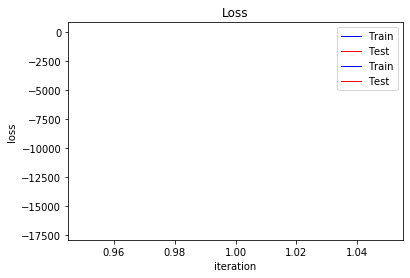

In [9]:
RankModel = ListNet()
RankModel.fit(X, y, batchsize=10, n_epoch=1, n_units1=128, n_units2=128, tv_ratio=0.85, optimizerAlgorithm="Adam", savefigName="result.pdf", savemodelName="ListNet.model")

In [ ]:
ans=RankModel.predict(X)
for i in ans:
    print(i[0])

In [ ]:
# for i in range(0,len(data[4])):
#     data[4][i]=convertToNumber(data[4][i])
# for i in range(0,len(data[5])):
#     data[5][i]=convertToNumber(data[5][i])
# for i in range(0,len(data[6])):
#     data[6][i]=convertToNumber(data[6][i])
# for i in range(0,len(data[7])):
#     data[7][i]=convertToNumber(data[7][i])
# for i in range(0,len(data[10])):
#     data[10][i]=convertToNumber(data[10][i])
# for i in range(0,len(data[11])):
#     data[11][i]=convertToNumber(data[11][i])
# for i in range(0,len(data[12])):
#     data[12][i]=convertToNumber(data[12][i])
# for i in range(0,len(data[13])):
#     data[13][i]=convertToNumber(data[13][i])
# for i in range(0,len(data[16])):
#     data[16][i]=convertToNumber(data[16][i])
# for i in range(0,len(data[17])):
#     data[17][i]=convertToNumber(data[17][i])
# plt.plot(data[0], data[4])
plt.plot(data[0], data[5])
plt.plot(data[0], data[6])
plt.plot(data[0], data[7])
plt.plot(data[0], data[10])
plt.plot(data[0], data[11])
plt.plot(data[0], data[12])
plt.plot(data[0], data[13])
plt.plot(data[0], data[16])
plt.plot(data[0], data[17])

In [ ]:
tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
#tweet_boxes = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2','data-testid':'tweet'})
tweet_boxes = tutorial_soup.find_all('div',{'class':'css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-5f2r5o r-1mi0q7o'})
len(tweet_boxes)
tweet_boxes[1].findChildren('div',recursive=False)[3].attrs.get('aria-label')
for i in range(0,len(tweet_boxes)):
    print(tweet_boxes[i].findChildren('div',recursive=False)[3].attrs.get('aria-label'))
#     tweet_boxes[i].findChildren('div',recursive=False)[3].attrs.get('aria-label')
box = tweet_boxes[2]
#small_boxes = box.find_all('div',{'class':'css-901oao r-hkyrab r-1qd0xha r-a023e6 r-16dba41 r-ad9z0x r-bcqeeo r-bnwqim r-qvutc0','lang':'en'})
if(box.find('img')):
    small_boxes = box.find('img')
    print(small_boxes)
boxes = tweet_boxes[2]
#boxes.text
#span = boxes.find_all('span',{'class':'css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0'})
span = boxes.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
span[4].text
#span[len(span)-1].text.isdigit()<div dir="ltr" class="">

In [ ]:
from sklearn.linear_model import LinearRegression
logreg = LinearRegression()

In [ ]:
logreg.fit(X, y)

In [ ]:
np.array(training_Y).shape

In [ ]:
logreg.classes_

In [ ]:
import random
# random.shuffle(training_X)
# x=logreg.predict(preprocessing.normalize(np.array(training_X)))
x=logreg.predict(X)

In [ ]:
import scipy.stats as ss
y=ss.rankdata(x)
# np.array(y).shape

In [ ]:
logreg.coef_

In [ ]:
['rank', 'Query', 'username', 'created_at', 'verified', 'followers_count', 'friends_count', 'listed_count', 'tweet', 'date', 'Img_present', 'likes', 'comments', 'retweets', 'tags', 'mentions', 'sum_followers_mention', 'url_count']

In [ ]:
# for i in training_Y:
#     print(i)
ans=0;
for i in range(0,len(y)):
    print(y[i])
    ans=ans+(y[i]-training_Y[i])**2

In [ ]:
ans/len(y)

In [ ]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)

In [ ]:
clf.predict(X[:2, :])

In [ ]:
clf.classes_

In [ ]:
np.unique(y)

In [22]:
x=[1,2,5,4,9]
N=len(x)

In [23]:
perm = np.random.permutation(N)

In [27]:
np.asarray(x[perm[1:2]])

TypeError: only integer scalar arrays can be converted to a scalar index